# Log Reggression

## Imports

In [50]:
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

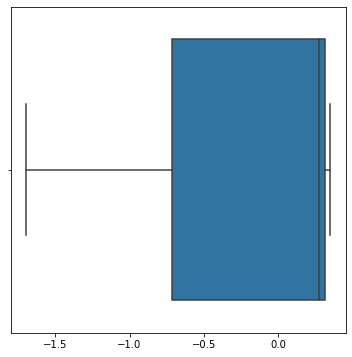

In [52]:
%matplotlib inline
data = np.random.normal(0, 1, 3)
# array([-1.18878589,  0.59627021,  1.59895721])
plt.figure(figsize=(6, 6))
sns.boxplot(x=data);

## Read Data

### Df's for mapping from...

In [2]:
df_id_admin = pd.read_csv(r'..\dataset_diabetes\admin_source.csv')
df_id_admin.set_index("admission_source_id", inplace=True)
df_id_admin.head()

,description
admission_source_id,
1,Physician Referral
2,Clinic Referral
3,HMO Referral
4,Transfer from a hospital
5,Transfer from a Skilled Nursing Facility (SNF)


In [3]:
dict_admin_source = df_id_admin.to_dict()['description']
dict_admin_source

{1: ' Physician Referral',
 2: 'Clinic Referral',
 3: 'HMO Referral',
 4: 'Transfer from a hospital',
 5: ' Transfer from a Skilled Nursing Facility (SNF)',
 6: ' Transfer from another health care facility',
 7: ' Emergency Room',
 8: ' Court/Law Enforcement',
 9: ' Not Available',
 10: ' Transfer from critial access hospital',
 11: 'Normal Delivery',
 12: ' Premature Delivery',
 13: ' Sick Baby',
 14: ' Extramural Birth',
 15: 'Not Available',
 17: nan,
 18: ' Transfer From Another Home Health Agency',
 19: 'Readmission to Same Home Health Agency',
 20: ' Not Mapped',
 21: 'Unknown/Invalid',
 22: ' Transfer from hospital inpt/same fac reslt in a sep claim',
 23: ' Born inside this hospital',
 24: ' Born outside this hospital',
 25: ' Transfer from Ambulatory Surgery Center',
 26: 'Transfer from Hospice'}

In [4]:
df_admin_type = pd.read_csv(r'..\dataset_diabetes\admin_type.csv')
df_admin_type.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [5]:
dict_admin_type = df_admin_type.to_dict()['description']
dict_admin_type

{0: 'Emergency',
 1: 'Urgent',
 2: 'Elective',
 3: 'Newborn',
 4: 'Not Available',
 5: nan,
 6: 'Trauma Center',
 7: 'Not Mapped'}

In [6]:
df_id_discharge = pd.read_csv(r'..\dataset_diabetes\discharge_dispo.csv')
df_id_discharge.head()

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...


In [7]:
dict_discharge_dispo = df_id_discharge.to_dict()['description']
dict_discharge_dispo

{0: 'Discharged to home',
 1: 'Discharged/transferred to another short term hospital',
 2: 'Discharged/transferred to SNF',
 3: 'Discharged/transferred to ICF',
 4: 'Discharged/transferred to another type of inpatient care institution',
 5: 'Discharged/transferred to home with home health service',
 6: 'Left AMA',
 7: 'Discharged/transferred to home under care of Home IV provider',
 8: 'Admitted as an inpatient to this hospital',
 9: 'Neonate discharged to another hospital for neonatal aftercare',
 10: 'Expired',
 11: 'Still patient or expected to return for outpatient services',
 12: 'Hospice / home',
 13: 'Hospice / medical facility',
 14: 'Discharged/transferred within this institution to Medicare approved swing bed',
 15: 'Discharged/transferred/referred another institution for outpatient services',
 16: 'Discharged/transferred/referred to this institution for outpatient services',
 17: nan,
 18: 'Expired at home. Medicaid only, hospice.',
 19: 'Expired in a medical facility. Medic

### Diabetes df

In [8]:
df_diabetes = pd.read_csv(r"https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%202/Data/diabetic_data.csv", na_values='?')
print(df_diabetes.columns)
df_diabetes.head()

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Mapping

In [9]:
df_diabetes["admission_source_id"] = df_diabetes["admission_source_id"].map(dict_admin_source)
df_diabetes["admission_source_id"].head()

0     Physician Referral
1         Emergency Room
2         Emergency Room
3         Emergency Room
4         Emergency Room
Name: admission_source_id, dtype: object

In [10]:
df_diabetes["admission_type_id"] = df_diabetes["admission_type_id"].map(dict_admin_type)
df_diabetes["admission_type_id"].head()

0    Trauma Center
1           Urgent
2           Urgent
3           Urgent
4           Urgent
Name: admission_type_id, dtype: object

In [11]:
df_diabetes["discharge_disposition_id"] = df_diabetes["discharge_disposition_id"].map(dict_discharge_dispo)
df_diabetes["discharge_disposition_id"].head()

0                                      Unknown/Invalid
1    Discharged/transferred to another short term h...
2    Discharged/transferred to another short term h...
3    Discharged/transferred to another short term h...
4    Discharged/transferred to another short term h...
Name: discharge_disposition_id, dtype: object

### Add binary target

In [12]:
binary_target = {
        'NO':0,
        '>30':0,
        '<30':1
}

In [13]:
df_diabetes["was_readmitted"] = df_diabetes["readmitted"].map(binary_target)
df_diabetes["was_readmitted"].head()

0    0
1    0
2    0
3    0
4    0
Name: was_readmitted, dtype: int64

In [14]:
df_diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'was_readmitted'],
      dtype='object')

### Write to csv

In [15]:
# df_diabetes.to_csv('mapped_diabetes.csv',index=False)

In [16]:
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,was_readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Trauma Center,Unknown/Invalid,Physician Referral,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,Urgent,Discharged/transferred to another short term h...,Emergency Room,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,Urgent,Discharged/transferred to another short term h...,Emergency Room,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,Urgent,Discharged/transferred to another short term h...,Emergency Room,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,Urgent,Discharged/transferred to another short term h...,Emergency Room,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


### Variable seperation

In [17]:
cat_vars_1 =['race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'payer_code', 'medical_specialty','change', 'diabetesMed', 'insulin'
       ]

cat_vars_2 =[
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'
       ]

cat_vars_3 = ['diag_1', 'diag_2', 'diag_3']

In [18]:
con_vars = ['time_in_hospital', 'number_diagnoses',
    'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient',
]

In [19]:
target_vars= ['readmitted', 'was_readmitted']

## EDA

In [20]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         96661 non-null   object
 7   discharge_disposition_id  101752 non-null  object
 8   admission_source_id       94985 non-null   object
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### MSNO Matrix

<AxesSubplot:>

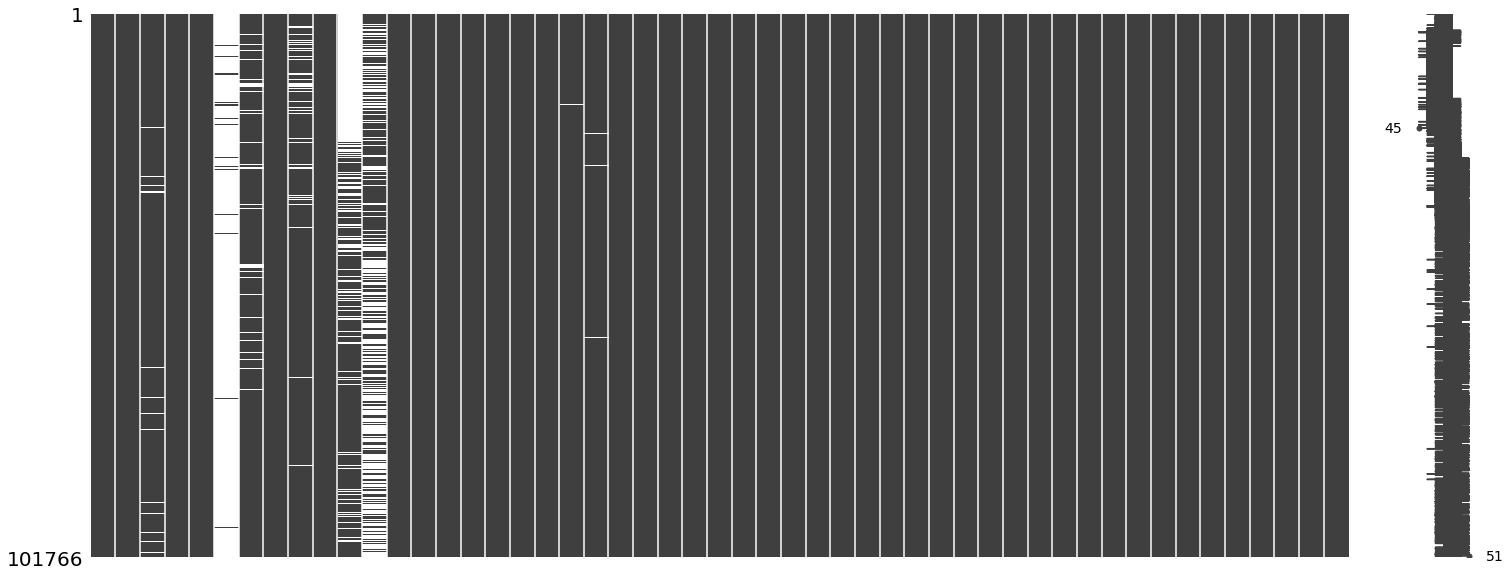

In [21]:
# missing values matrix
msno.matrix(df_diabetes)

### Check class imbalance

In [137]:
df_gb = df_diabetes.groupby("was_readmitted")["readmitted"].count().reset_index(name="target_count")
df_gb["percent"] = df_gb.target_count/df_gb.target_count.sum()

df_gb

,was_readmitted,target_count,percent
0,0,90409,0.888401
1,1,11357,0.111599


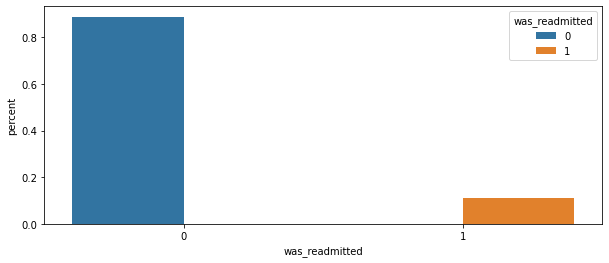

In [138]:
plt.figure(figsize=(10,4))
sns.barplot(x="was_readmitted", y="percent", hue="was_readmitted", data=df_gb)
plt.show()

### cat_vars_1 EDA

medical_specialty           72
discharge_disposition_id    25
payer_code                  17
admission_source_id         16
age                         10
weight                       9
admission_type_id            6
race                         5
insulin                      4
gender                       3
change                       2
diabetesMed                  2
dtype: int64


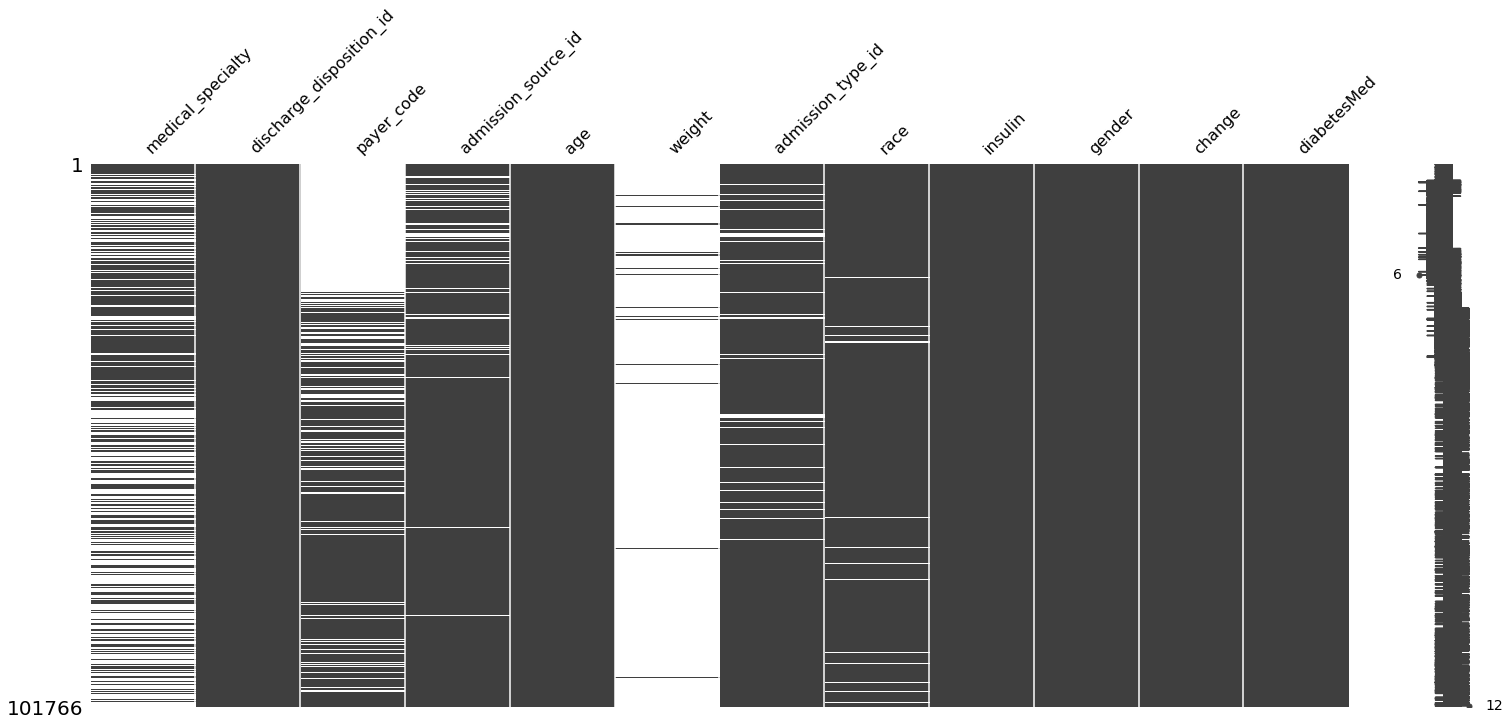

In [139]:
print(df_diabetes[cat_vars_1].nunique().sort_values(ascending=False))
msno.matrix(df_diabetes[list(df_diabetes[cat_vars_1].nunique().sort_values(ascending=False).index)])
val_counts = df_diabetes["medical_specialty"].value_counts().sort_values(ascending=False)

In [142]:
df_gb = df_diabetes.groupby(["was_readmitted", "gender"])["readmitted"].count().reset_index(name="target_count")
df_gb["percent"] = df_gb["target_count"]/df_gb.target_count.sum()

df_gb

,was_readmitted,gender,target_count,percent
0,0,Female,48556,0.477134
1,0,Male,41850,0.411238
2,0,Unknown/Invalid,3,0.000029
3,1,Female,6152,0.060452
4,1,Male,5205,0.051147


In [151]:
cat_value = "medical_specialty"

df_gb = df_diabetes.groupby(["was_readmitted", cat_value])["readmitted"].count().reset_index(name="target_count")
df_gb["percent"] = df_gb["target_count"]/df_gb.target_count.sum()
df_gb.sort_values(by=["percent"], ascending=False, inplace=True)
df_gb

,was_readmitted,medical_specialty,target_count,percent
18,0,InternalMedicine,12989,0.250671
8,0,Emergency/Trauma,6719,0.129668
11,0,Family/GeneralPractice,6557,0.126541
3,0,Cardiology,4927,0.095085
62,0,Surgery-General,2757,0.053206
...,...,...,...,...
21,0,Neurophysiology,1,0.000019
99,1,Pathology,1,0.000019
98,1,OutreachServices,1,0.000019
79,1,Endocrinology-Metabolism,1,0.000019


<AxesSubplot:xlabel='medical_specialty', ylabel='percent'>

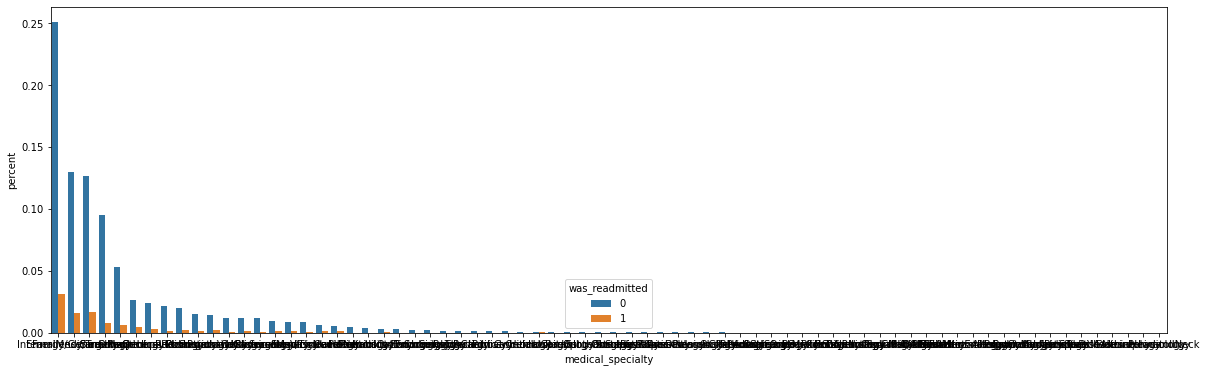

In [152]:

plt.figure(figsize=(20, 6))
sns.barplot(x=cat_value, y="percent", data=df_gb, hue='was_readmitted')

In [185]:
df_gb[df_gb.medical_specialty == "InternalMedicine"]

,was_readmitted,medical_specialty,target_count,percent
18,0,InternalMedicine,12989,0.250671
86,1,InternalMedicine,1646,0.031766


In [182]:
df_gb_ = df_gb.groupby([cat_value])["target_count"].diff().reset_index(name="target_diff")
# df_gb["percent"] = df_gb["target_count"]/df_gb.target_count.sum()
df_gb_.sort_values(by=["target_diff"], ascending=True, inplace=True)
df_gb_ = df_gb.reset_index().merge(df_gb_, on="index", how="left")
df_gb_.sort_values(by=["target_diff"], inplace=True)
df_gb_

,index,was_readmitted,medical_specialty,target_count,percent,target_diff
5,86,1,InternalMedicine,1646,0.031766,-11343.0
11,77,1,Emergency/Trauma,846,0.016327,-5873.0
10,80,1,Family/GeneralPractice,883,0.017041,-5674.0
20,75,1,Cardiology,425,0.008202,-4502.0
21,120,1,Surgery-General,342,0.006600,-2415.0
...,...,...,...,...,...,...
120,56,0,Speech,1,0.000019,NaN
124,39,0,Pediatrics-InfectiousDiseases,1,0.000019,NaN
125,48,0,Psychiatry-Addictive,1,0.000019,NaN
126,46,0,Proctology,1,0.000019,NaN


<AxesSubplot:xlabel='medical_specialty', ylabel='target_diff'>

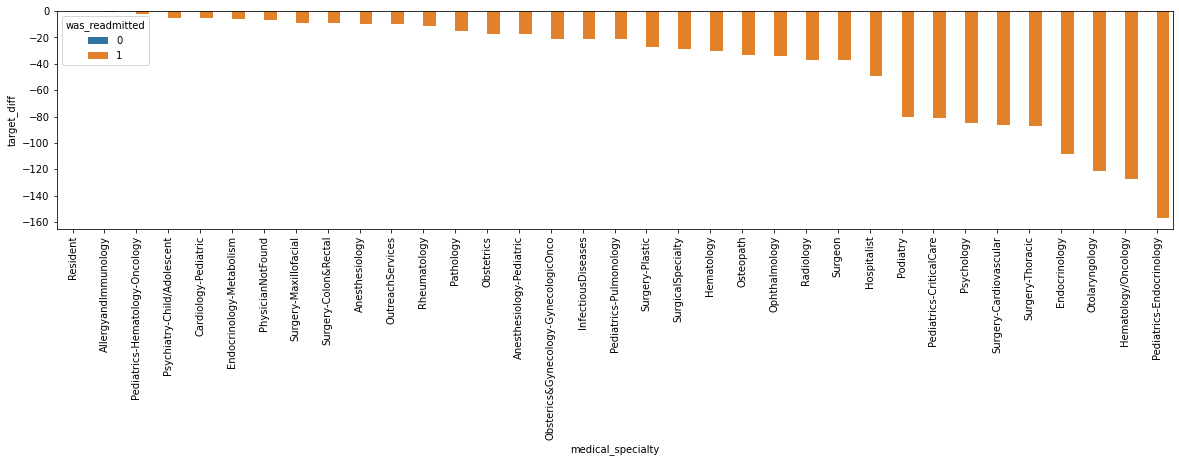

In [188]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.barplot(x=cat_value, y="target_diff", data=df_gb_.nlargest(35, 'target_diff'), hue='was_readmitted')

<AxesSubplot:xlabel='medical_specialty', ylabel='percent'>

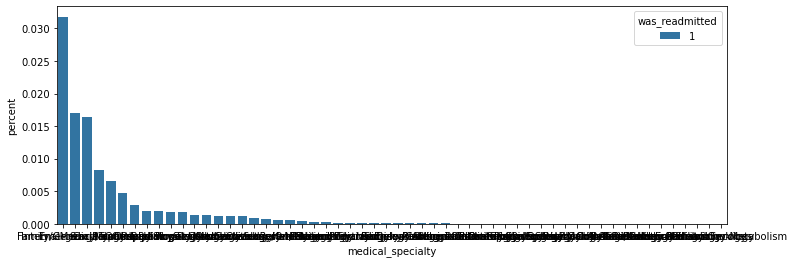

In [96]:
plt.figure(figsize=(12,4))
# df_gb = df_gb[df_gb.was_readmitted == 1]
sns.barplot(x=cat_value, y="percent", data=df_gb, hue='was_readmitted')

### cat_vars_2

max_glu_serum               4
glipizide                   4
glyburide-metformin         4
miglitol                    4
acarbose                    4
A1Cresult                   4
pioglitazone                4
glyburide                   4
rosiglitazone               4
glimepiride                 4
chlorpropamide              4
nateglinide                 4
repaglinide                 4
metformin                   4
tolazamide                  3
acetohexamide               2
tolbutamide                 2
troglitazone                2
glipizide-metformin         2
glimepiride-pioglitazone    2
metformin-rosiglitazone     2
metformin-pioglitazone      2
examide                     1
citoglipton                 1
dtype: int64


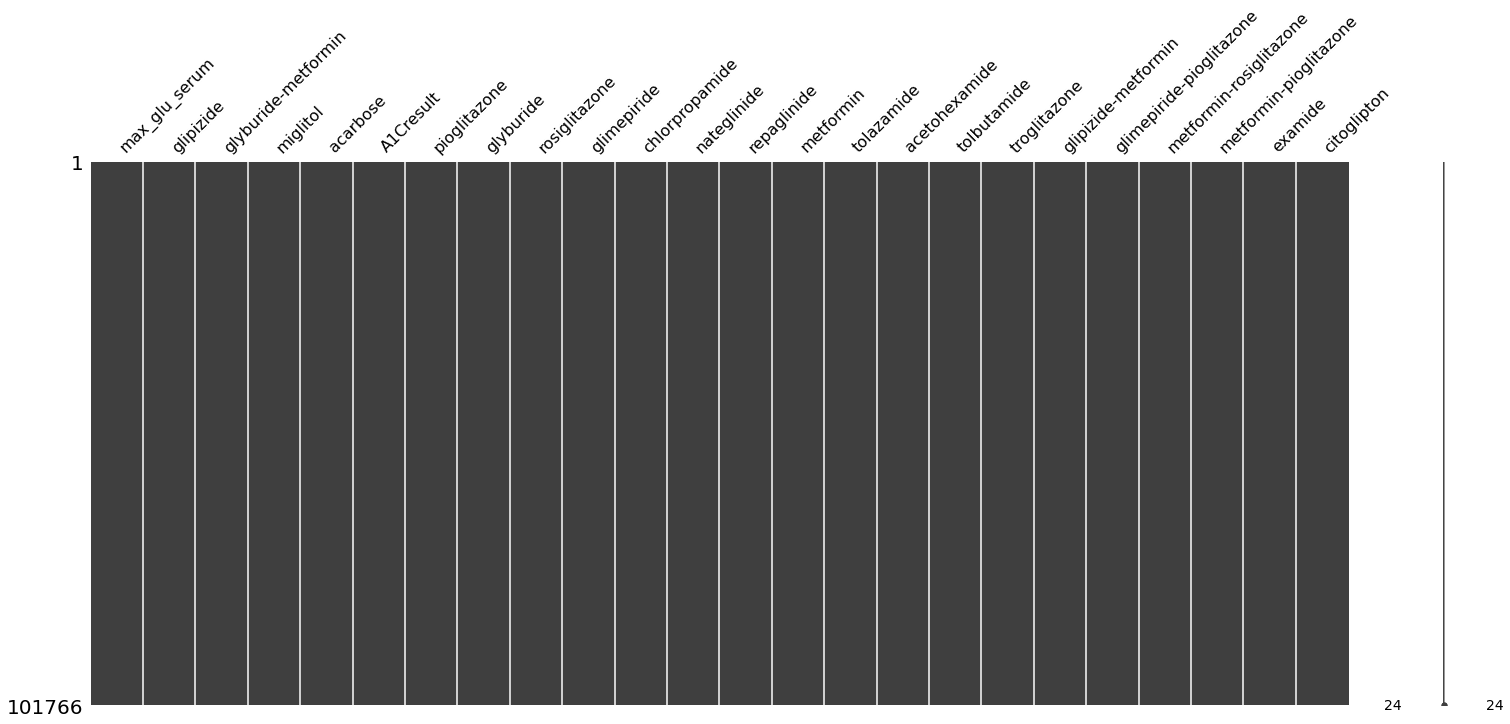

In [192]:
print(df_diabetes[cat_vars_2].nunique().sort_values(ascending=False))
msno.matrix(df_diabetes[list(df_diabetes[cat_vars_2].nunique().sort_values(ascending=False).index)])
val_counts = df_diabetes["medical_specialty"].value_counts().sort_values(ascending=False)

### cat_vars_3

diag_3    789
diag_2    748
diag_1    716
dtype: int64


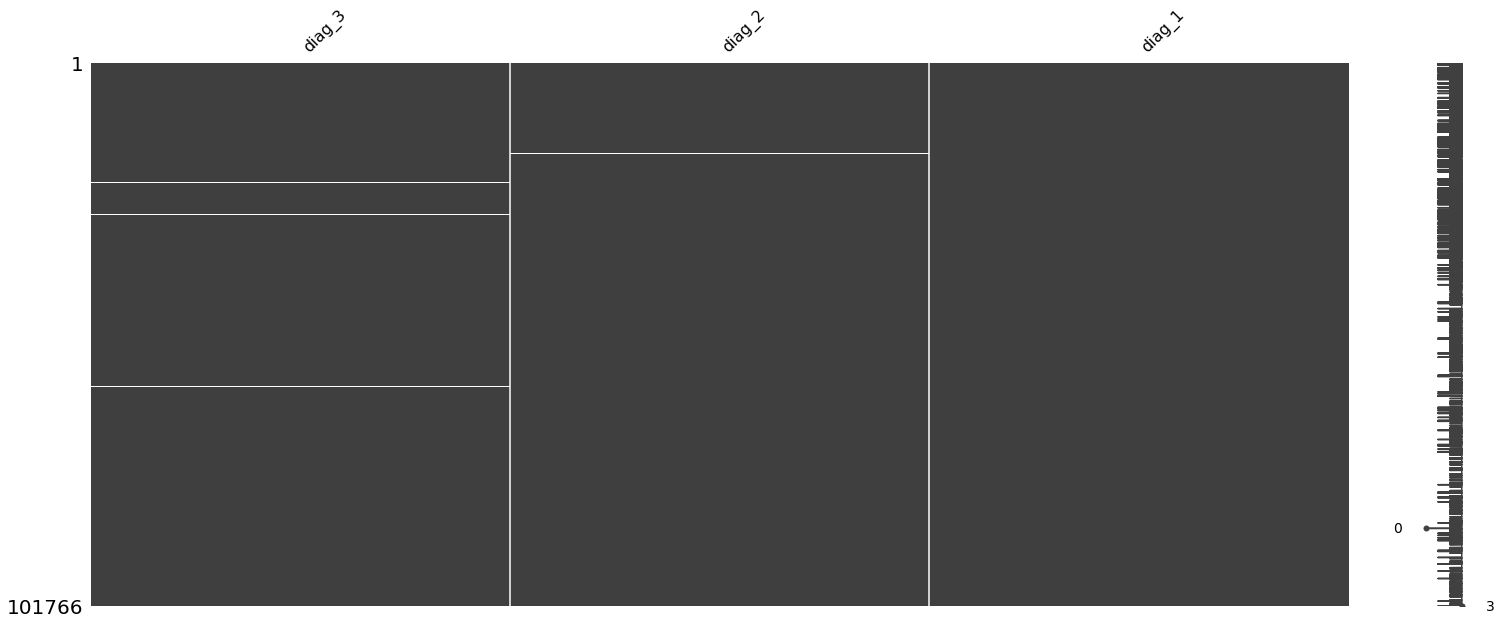

In [201]:
print(df_diabetes[cat_vars_3].nunique().sort_values(ascending=False))
msno.matrix(df_diabetes[list(df_diabetes[cat_vars_3].nunique().sort_values(ascending=False).index)])
val_counts = df_diabetes["medical_specialty"].value_counts().sort_values(ascending=False)

# df_gb = df_diabetes[cat_vars_3].copy()
# df_gb[cat_vars_3] = df_gb[cat_vars_3].astype(str)
# df_gb

In [217]:
cat_value = "diag_2"

df_gb = df_diabetes.groupby(["was_readmitted", cat_value])["readmitted"].count().reset_index(name="target_count")
df_gb["percent"] = df_gb["target_count"]/df_gb.target_count.sum()
df_gb.sort_values(by=["percent"], ascending=False, inplace=True)
df_gb[df_gb.diag_2 == "272" ]

,was_readmitted,diag_2,target_count,percent
126,0,272,400,0.003944
821,1,272,20,0.000197


<AxesSubplot:xlabel='diag_2', ylabel='percent'>

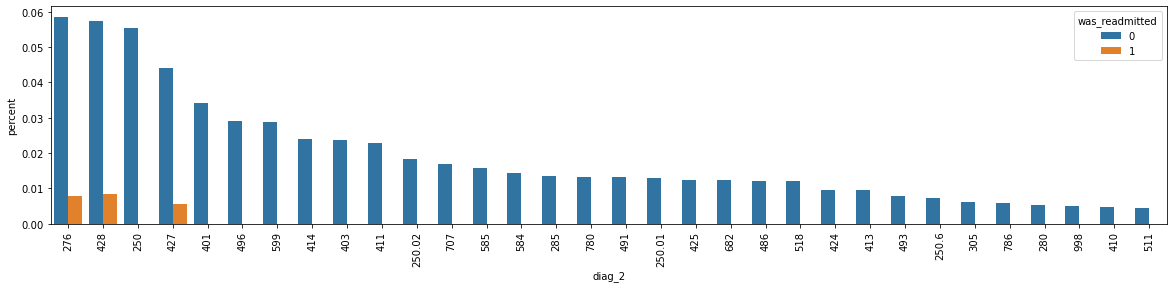

In [221]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.barplot(x=cat_value, y="percent", data=df_gb.nlargest(35, 'target_count'), hue='was_readmitted')